<a href="https://colab.research.google.com/github/Abdullah042973/AI-in-medical-domain/blob/main/CNN_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.4.1'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/X-ray and CT scan ( binary classification )/TRAINING',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 16127 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/X-ray and CT scan ( binary classification )/TESTING',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 3370 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='linear'))

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
504/504 [==============================] - 9793s 19s/step - loss: 0.5293 - accuracy: 0.7103 - val_loss: 0.5395 - val_accuracy: 0.7463
Epoch 2/50
504/504 [==============================] - 326s 646ms/step - loss: 0.3801 - accuracy: 0.8137 - val_loss: 0.5724 - val_accuracy: 0.7246
Epoch 3/50
504/504 [==============================] - 314s 623ms/step - loss: 0.3402 - accuracy: 0.8444 - val_loss: 0.4992 - val_accuracy: 0.7546
Epoch 4/50
504/504 [==============================] - 304s 603ms/step - loss: 0.3180 - accuracy: 0.8477 - val_loss: 0.4987 - val_accuracy: 0.7386
Epoch 5/50
504/504 [==============================] - 303s 601ms/step - loss: 0.2901 - accuracy: 0.8648 - val_loss: 0.5604 - val_accuracy: 0.7368
Epoch 6/50
504/504 [==============================] - 304s 605ms/step - loss: 0.2620 - accuracy: 0.8816 - val_loss: 0.5327 - val_accuracy: 0.7653
Epoch 7/50
504/504 [==============================] - 298s 592ms/step - loss: 0.2560 - accuracy: 0.8869 - val_loss: 0.5656 - 

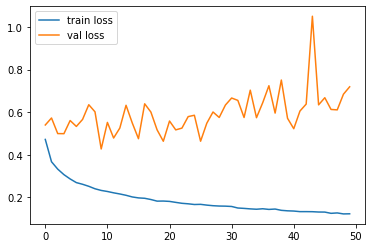

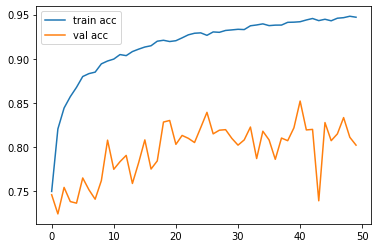

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
final_accuracy = r.history["val_accuracy"][-15:]
print("FINAL ACCURACY MEAN-15: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-15:  0.8109001000722249


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/covid xray and ct scan/test/COVID-19/COVID-19 (12).jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result[0]
for i in result[0]:
  result = i*100
  print(float(result))

1.2598027865351469e-05


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
import tensorflow as tf
 
from keras.models import load_model
 
cnn.save('CNN (binary classification).h5')